In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [9]:
INCREASE_PROB = 0.5
INITIAL_POP_SIZE = 250
GENERATIONS = 2000
STARTING_FITNESS = 25

In [3]:
# survives()
#
# Creatures face competition for survival, which causes selection.
# We may want to redefine survival rates in terms of "prey" as
# discussed in class and use those equations. This would be more
# realistic than the survival function below.
#
# For now, each creature's survival is determined by their fitness
# with some random noise plugged into a logistic function. If this
# perturbed fitness is greater than SURVIVAL_THRESHOLD (a randomly 
# chosen threshold that we should think more about) then it survives.
def survives(creature):
    return 0 < creature.fitness

# reproduce()
# For now, every creature has only one offspring, produced asexually.
def reproduce(creature):
    children = []
    for _ in range(1):
        children.append(birthOffspring(creature))
    return children

# birthChild()
# Each creature reproduces asexually. Offspring has a fitness mutation
# with probability MUTATION_PROBABILITY. The mutation causes
# the fitness level to be a slight variation of the parent fitness.
# Otherwise, the child inherits the parent's fitness level.
def birthOffspring(creature):
    if random.random() < 0.5:
        return Creature(creature.fitness + 1)
    else:
        return Creature(creature.fitness - 1)

def printCreatures(currentCreatures):
    for creature in currentCreatures:
        print(creature.fitness, end=" ")
    print()

# Creature
# Our creatures are currently very simple and only have one trait:
# Their fitness level. A higher fitness level should increase a
# creature's chances of successful survival and reproduction.
class Creature:
    def __init__(self, fitness):
        self.fitness = fitness

# calculateAverage()
# Calculates the average fitness of a list of creatures.
def calculateAverage(creaturesList):
    return sum([creature.fitness for creature in creaturesList]) / len(creaturesList)

In [4]:
# runSimulation()
# This function runs one evolutionary simulation. In it, we create an initial
# population of creatures and then let a number of generations pass while
# subjecting the creatures to selective pressure. We record the average
# fitness of the population and number of creatures at each generation.
def runSimulation():
    # The first generation of creatures has population size INITIAL_POP_SIZE.
    # Each of these creatures has a fitness level of 1.
    currentCreatures = []
    for _ in range(INITIAL_POP_SIZE):
        currentCreatures.append(Creature(STARTING_FITNESS))
    
    # printCreatures(currentCreatures)
    
    # We will track the average fitness of the population after each generation.
    fitnessHist = []
    fitnessHist.append(calculateAverage(currentCreatures))
    
    minFitness = []
    minFitness.append(STARTING_FITNESS)
    
    populationSize = []
    populationSize.append(len(currentCreatures))
    
    # Simulate GENERATIONS generations of creatures, recording the average
    # fitness level at each generation.
    for _ in range(GENERATIONS):
        childCreatures = []
        while len(childCreatures) < INITIAL_POP_SIZE and sum([creature.fitness for creature in currentCreatures]) > 0:
            creature = random.choice(currentCreatures)
            if survives(creature):
                children = reproduce(creature)
                childCreatures += children
            
        currentCreatures = childCreatures
        fitnessHist.append(calculateAverage(currentCreatures))
        minFitness.append(min([creature.fitness for creature in currentCreatures]))
        populationSize.append(len(currentCreatures))
        
        # printCreatures(currentCreatures)
    
    return fitnessHist, minFitness, populationSize

In [5]:
fitnessAverages = []
minFitnessList = []
populationSizes = []

for _ in range(5):
    fitnessHist, minFitness, populationSize = runSimulation()
    fitnessAverages.append(fitnessHist)
    minFitnessList.append(minFitness)
    populationSizes.append(populationSize)

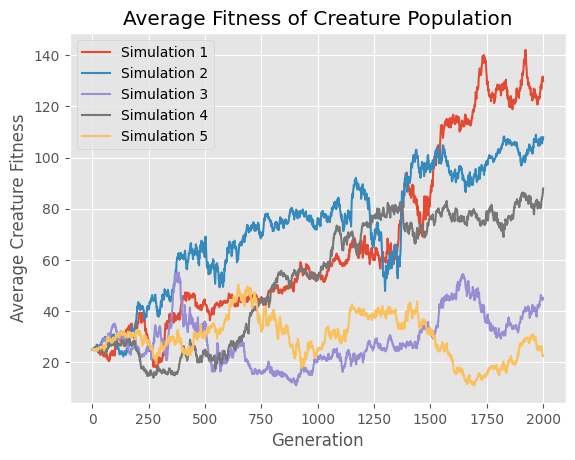

In [6]:
plt.figure()
plt.style.use("ggplot")
plt.xlabel("Generation")
plt.ylabel("Average Creature Fitness")
plt.title("Average Fitness of Creature Population")
for i, fitnessHist in enumerate(fitnessAverages):
    plt.plot(fitnessHist, label = "Simulation " + str(i + 1))
plt.legend()
# plt.savefig("AverageFitness0.png")

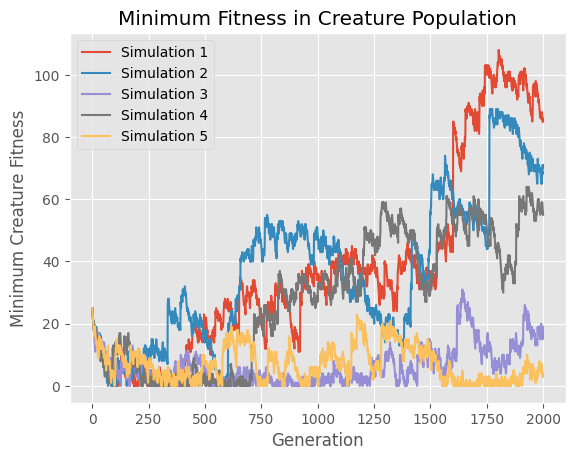

In [7]:
plt.figure()
plt.style.use("ggplot")
plt.xlabel("Generation")
plt.ylabel("Minimum Creature Fitness")
plt.title("Minimum Fitness in Creature Population")
for i, minFitness in enumerate(minFitnessList):
    plt.plot(minFitness, label = "Simulation " + str(i + 1))
plt.legend()
# plt.savefig("MinFitness0.png")

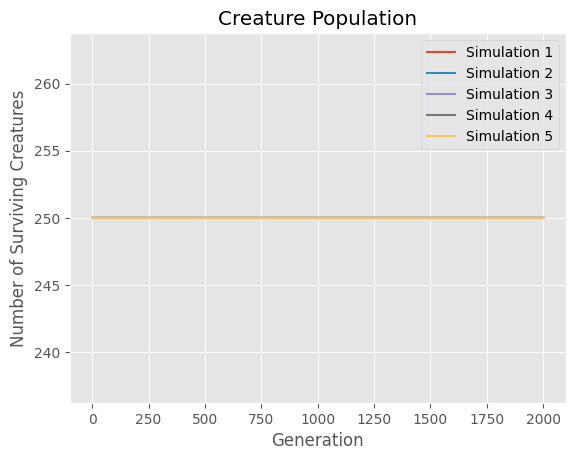

In [8]:
plt.figure()
plt.style.use("ggplot")
plt.xlabel("Generation")
plt.ylabel("Number of Surviving Creatures")
plt.title("Creature Population")
for i, populationSize in enumerate(populationSizes):
    plt.plot(populationSize, label = "Simulation " + str(i + 1))
plt.legend()
# plt.savefig("Population0.png")